**Dados sobre notas dos estudantes, obtidos do Kaggle.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Study analise de dados/StudentsPerformance.csv')
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
dados.rename(columns={
    	'gender' : 'genero',
      'race/ethnicity' : 'raça',
      'parental level of education' : 'nivel de escolaridade dos pais',
      'lunch' : 'merenda',
      'test preparation course' : 'curso tecnico de preparação',
      'math score' : 'nota de matematica',
      'reading score' : 'nota de leitura',
      'writing score' : 'nota de escrita',
},inplace = True)


In [4]:
dados.isnull().sum()

genero                            0
raça                              0
nivel de escolaridade dos pais    0
merenda                           0
curso tecnico de preparação       0
nota de matematica                0
nota de leitura                   0
nota de escrita                   0
dtype: int64

In [5]:
dados.shape

(1000, 8)

In [6]:
dados.nunique()

genero                             2
raça                               5
nivel de escolaridade dos pais     6
merenda                            2
curso tecnico de preparação        2
nota de matematica                81
nota de leitura                   72
nota de escrita                   77
dtype: int64

In [7]:
# dados duplicados
dados.duplicated().sum()

0

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   genero                          1000 non-null   object
 1   raça                            1000 non-null   object
 2   nivel de escolaridade dos pais  1000 non-null   object
 3   merenda                         1000 non-null   object
 4   curso tecnico de preparação     1000 non-null   object
 5   nota de matematica              1000 non-null   int64 
 6   nota de leitura                 1000 non-null   int64 
 7   nota de escrita                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
dados.describe()

,nota de matematica,nota de leitura,nota de escrita
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# porcentagem por genero
dados['genero'].value_counts(normalize = True) * 100

female    51.8
male      48.2
Name: genero, dtype: float64

In [11]:
# porcentagem por raça/etnia
dados['raça'].value_counts(normalize = True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: raça, dtype: float64

In [12]:
# porcentagem por nivel de escolaridade dos pais
dados['nivel de escolaridade dos pais'].value_counts(normalize = True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: nivel de escolaridade dos pais, dtype: float64

In [13]:
# porcentagem por lanche
dados['merenda'].value_counts(normalize = True) * 100

standard        64.5
free/reduced    35.5
Name: merenda, dtype: float64

In [14]:
# porcentagem por curso tecnico de preparação  
dados['curso tecnico de preparação'].value_counts(normalize = True) * 100

none         64.2
completed    35.8
Name: curso tecnico de preparação, dtype: float64

**graficos de notas e genero**

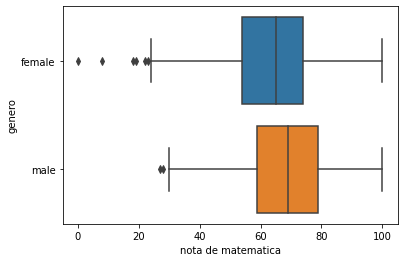

In [16]:
sns.boxplot(data = dados, x = 'nota de matematica', y = 'genero');

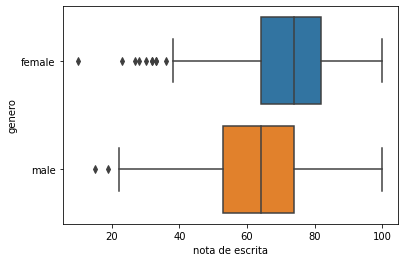

In [17]:
sns.boxplot(data = dados, x = 'nota de escrita', y = 'genero');

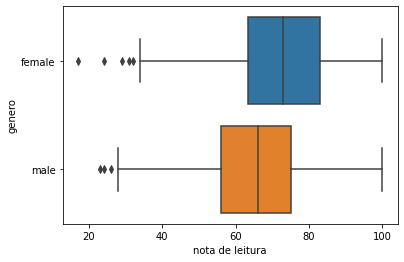

In [18]:
sns.boxplot(data = dados, x = 'nota de leitura', y = 'genero');

In [19]:
dados.groupby(by = ['genero']).describe()['nota de matematica']

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


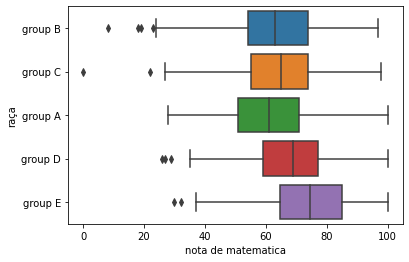

In [23]:
sns.boxplot(data = dados, x = 'nota de matematica', y = 'raça');

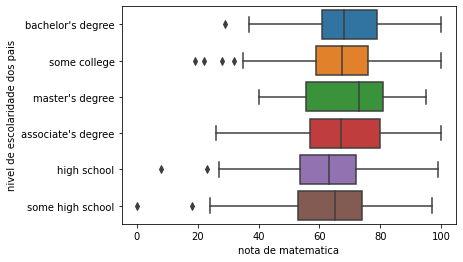

In [24]:
sns.boxplot(data = dados, x = 'nota de matematica', y = 'nivel de escolaridade dos pais');

In [28]:
dados.groupby(by = ['nivel de escolaridade dos pais']).describe()['nota de matematica']

,count,mean,std,min,25%,50%,75%,max
nivel de escolaridade dos pais,,,,,,,,
associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


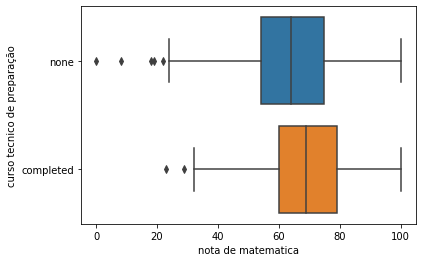

In [30]:
sns.boxplot(data = dados, x = 'nota de matematica', y = 'curso tecnico de preparação');

In [31]:
dados.groupby(by = ['curso tecnico de preparação']).describe()['nota de matematica']

,count,mean,std,min,25%,50%,75%,max
curso tecnico de preparação,,,,,,,,
completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


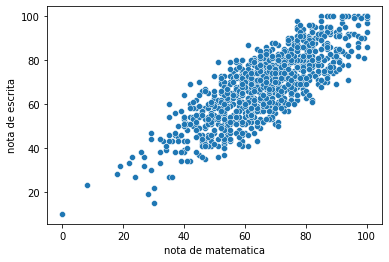

In [33]:
# comparando notas
sns.scatterplot(data = dados, x = 'nota de matematica', y = 'nota de escrita');